In [1]:
# Reference: https://stackoverflow.com/questions/15514593/importerror-no-module-named-when-trying-to-run-python-script/15622021#15622021
import sys
# sys.path.append(r'Z:\\Monte_Carlo4\\Grid_Orientation_002\\LISFLOOD_FP\\Analysis')
sys.path.append(r'S:\\Grid_Orientation_code_008_rmse\\LISFLOOD_FP\\Analysis')

In [2]:
import matplotlib.pyplot as plt                             # For plotting
import seaborn as sns                                       # For plotting
import pandas as pd                                         # For reading data

from comparison import get_datalist, statistic_df_dict, \
                       boxplotting, kdeplotting, comparison_calculation             # For boxplotting and kdeplotting

#### 1. Get data

In [3]:
building_path = fr"S:\\new_versions\data\buildings\lds-nz-building-outlines-all-sources-SHP_002.zip"

In [4]:
list_filename = [
    r"S:\\new_versions_006_forpublication\\vers003",
    r"S:\\new_versions_006_forpublication\\vers004",
    r"S:\\new_versions_006_forpublication\\vers005",
    r"S:\\new_versions_006_forpublication\\vers002",
    r"S:\\new_versions_006_forpublication\\vers001"
]

name = [
    'E translation',
    'N translation',
    'N-E translation',
    'rotation',
    'rotation\n&\nN-E translation'
]

list_resolution = [10]

In [5]:
%%time
trans_datasets = get_datalist(
    list_filename,
    list_resolution,
    building_path,
    0.1
)

trans_comparison = statistic_df_dict(
    name,
    trans_datasets
)

CPU times: total: 2min 28s
Wall time: 3min 10s


#### 2. Execution

#### 2.1. Boxplots

In [8]:
q_area = comparison_calculation(trans_comparison['area'], 'quartile dev')

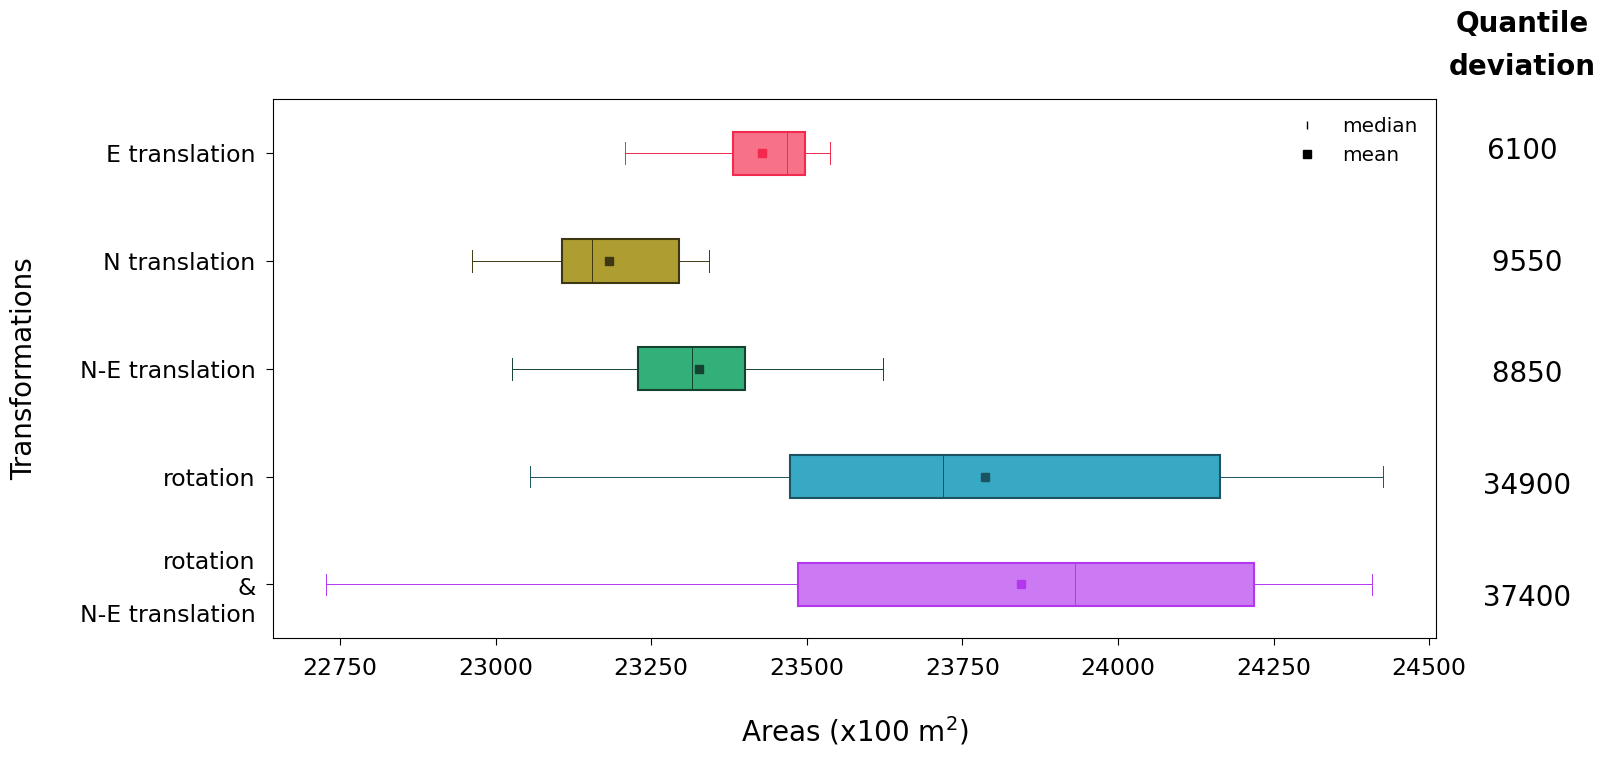

In [9]:
boxplotting(
    (15, 7),
    trans_comparison['area'],
    'Transformations',
    'area'
)

col1 = 'Quantile'
col2 = 'deviation'
data = '{0:.0f}\n {1:.0f}\n {2:.0f}\n {3:.0f}\n {4:.0f}'.format(q_area[0], q_area[1], q_area[2], q_area[3], q_area[4])

plt.text(2465000, -1.2, col1, fontsize=20, horizontalalignment='center', weight='bold',
         verticalalignment='center', linespacing=3.8)
plt.text(2465000, -.8, col2, fontsize=20, horizontalalignment='center', weight='bold',
         verticalalignment='center', linespacing=3.8)
plt.text(2465000, 2.05, data, fontsize=20, horizontalalignment='center',
         verticalalignment='center', linespacing=4.8)

# Save fig
plt.savefig(
    fr"S:\\new_versions_004\\area_transformation.png",
    bbox_inches='tight', dpi=600
)

In [10]:
q_building = comparison_calculation(trans_comparison['building'], 'quartile dev')

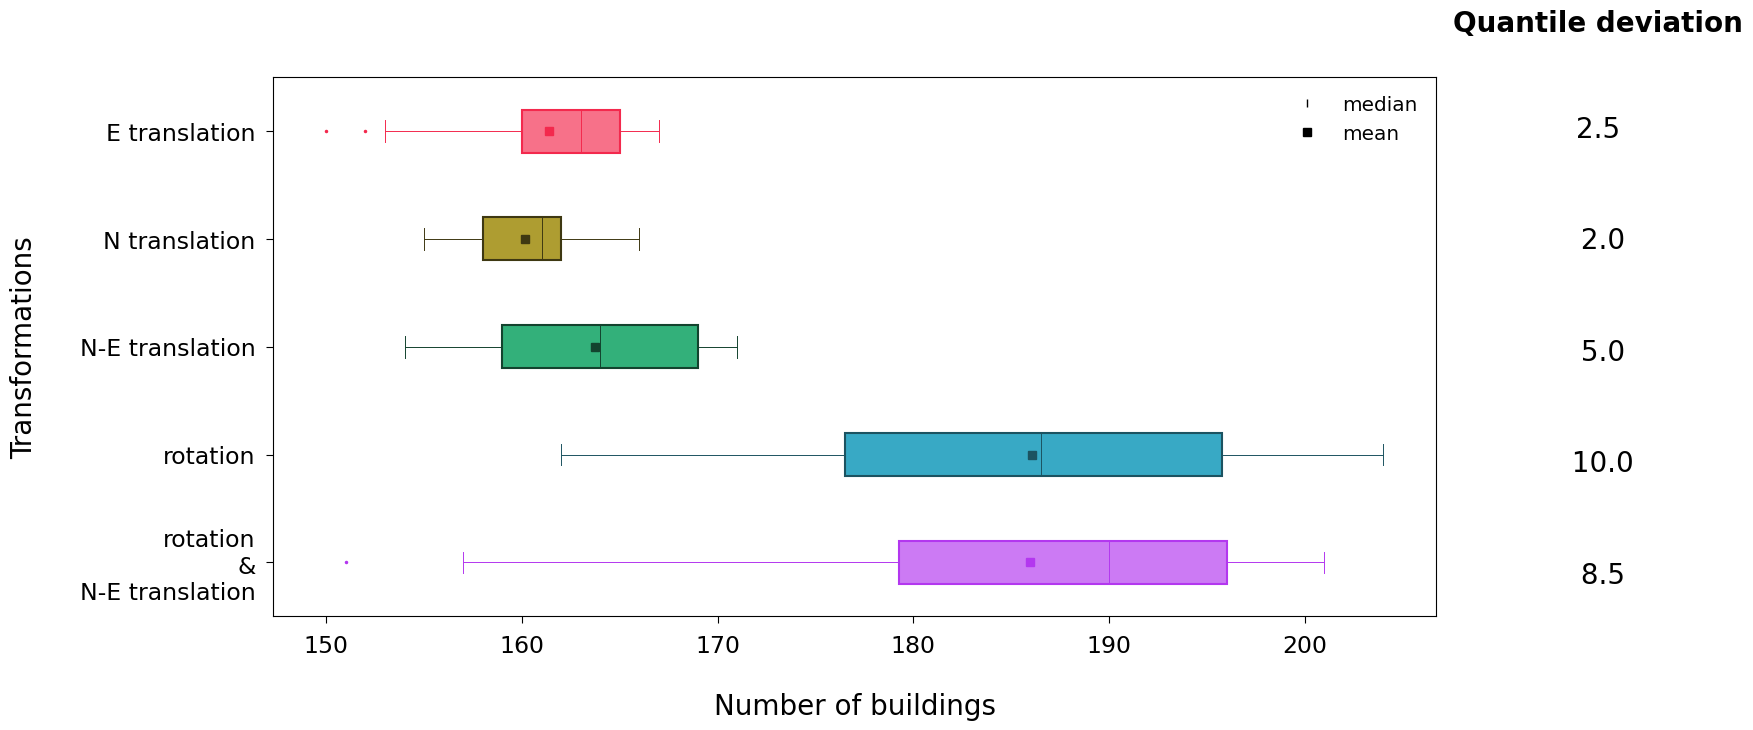

In [11]:
boxplotting(
    (15, 7),
    trans_comparison['building'],
    'Transformations',
    'building'
)

col = 'Quantile deviation'
data = ('{0:.1f}\n {1:.1f}\n {2:.1f}\n {3:.1f}\n {4:.1f}'.format(q_building[0], q_building[1], q_building[2], q_building[3], q_building[4]))

plt.text(215, -1, col, fontsize=20, horizontalalignment='center', weight='bold',
         verticalalignment='center', linespacing=3.8)
plt.text(215, 2.05, data, fontsize=20, horizontalalignment='center',
         verticalalignment='center', linespacing=4.8)

# Save fig
plt.savefig(
    fr"S:\\new_versions_004\\building_transformation.png",
    bbox_inches='tight', dpi=600
)

In [12]:
q_cv = comparison_calculation(trans_comparison['cv'], 'quartile dev')

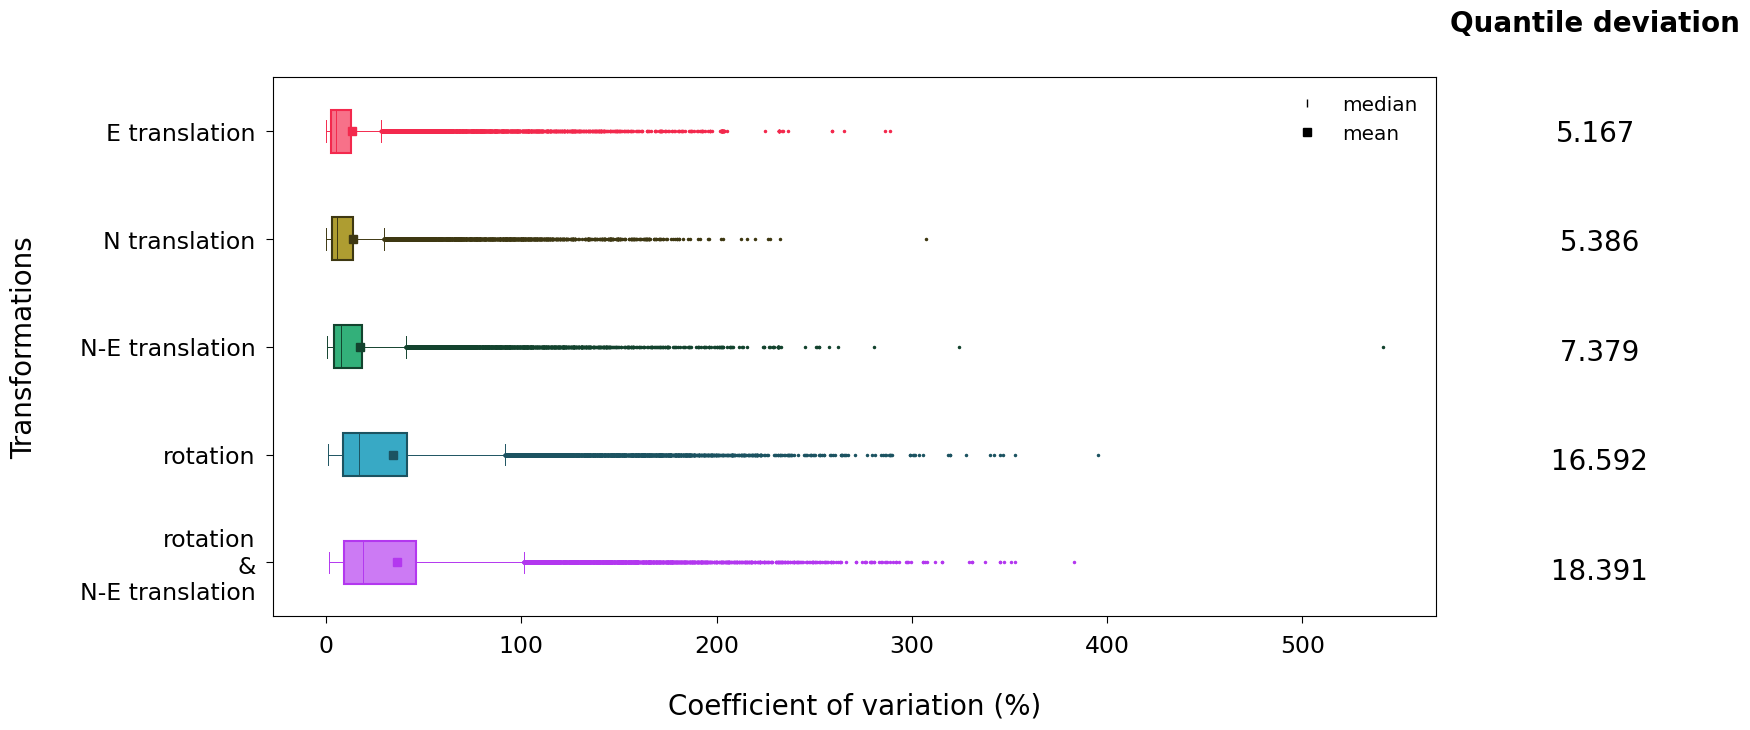

In [13]:
boxplotting(
    (15, 7),
    trans_comparison['cv'],
    'Transformations',
    'cv'
)

col = 'Quantile deviation'
data = '{0:.3f}\n {1:.3f}\n {2:.3f}\n {3:.3f}\n {4:.3f}'.format(q_cv[0], q_cv[1], q_cv[2], q_cv[3], q_cv[4])




plt.text(650, -1, col, fontsize=20, horizontalalignment='center', weight='bold',
         verticalalignment='center', linespacing=3.8)
plt.text(650, 2.05, data, fontsize=20, horizontalalignment='center',
         verticalalignment='center', linespacing=4.7)

# Save fig
plt.savefig(
    fr"S:\\new_versions_004\\cv_transformation.png",
    bbox_inches='tight', dpi=600
)

In [14]:
q_rmse = comparison_calculation(trans_comparison['rmse'], 'quartile dev')

Text(0.58, 2.05, '0.0045\n 0.0731\n 0.0689\n 0.0736\n 0.0275')

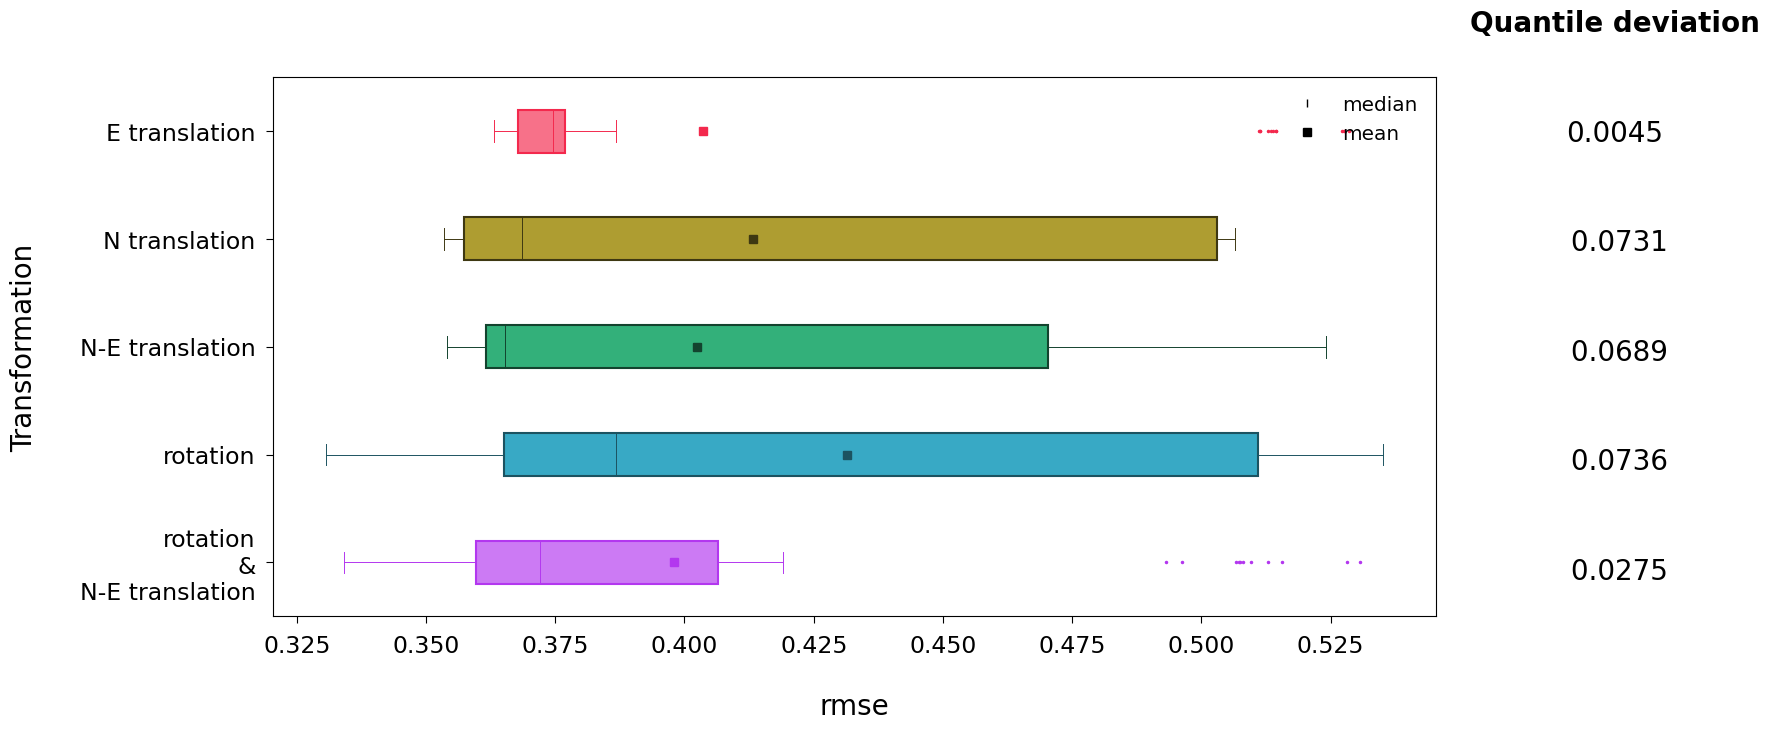

In [25]:
boxplotting(
    (15, 7),
    trans_comparison['rmse'],
    'Transformation',
    'rmse'
)

col = 'Quantile deviation'
data = '{0:.4f}\n {1:.4f}\n {2:.4f}\n {3:.4f}\n {4:.4f}'.format(q_rmse[0], q_rmse[1], q_rmse[2], q_rmse[3], q_rmse[4])




plt.text(.58, -1, col, fontsize=20, horizontalalignment='center', weight='bold',
         verticalalignment='center', linespacing=3.8)
plt.text(.58, 2.05, data, fontsize=20, horizontalalignment='center',
         verticalalignment='center', linespacing=4.7)

# # Save fig
# plt.savefig(
#     fr"S:\\new_versions_004\\cv_transformation.png",
#     bbox_inches='tight', dpi=600
# )

#### 2.2. Density

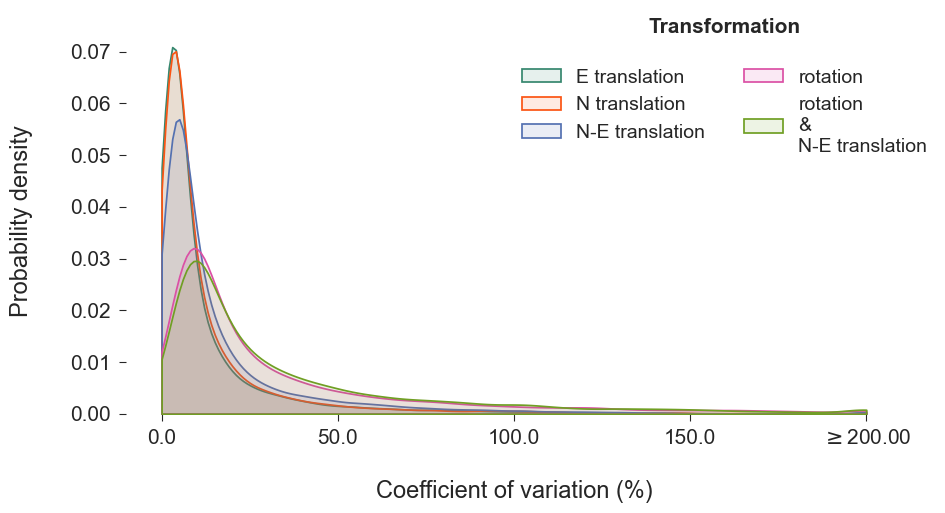

In [18]:
kdeplotting(
    (10, 5),
    trans_comparison['cv'],
    [0, 200.1, 50, 1, 0],
    'Transformation\n',
    [0.5, 0.65],
    'cv',
    r'$\geq $',
    'Set2'
)

-----------------------------------------------------------------

In [19]:
import matplotlib
import colorsys
import matplotlib.colors as mc

In [20]:
def lighten_color(color, amount=0.5):
    """
    @Definition:
                A function to lighten the color (by @IanHincks)
    @References:
                https://stackoverflow.com/questions/37765197/darken-or-lighten-a-color-in-matplotlib/49601444#49601444
                https://stackoverflow.com/questions/55656683/change-seaborn-boxplot-line-rainbow-color
    @Arguments:
                color (matplotlib color):
                                A tuple of 3 values of RGB color
                amount (float):
                                Level of brightness of color
    @Returns:
                A new tuple of 3 values of RGB color
    """
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

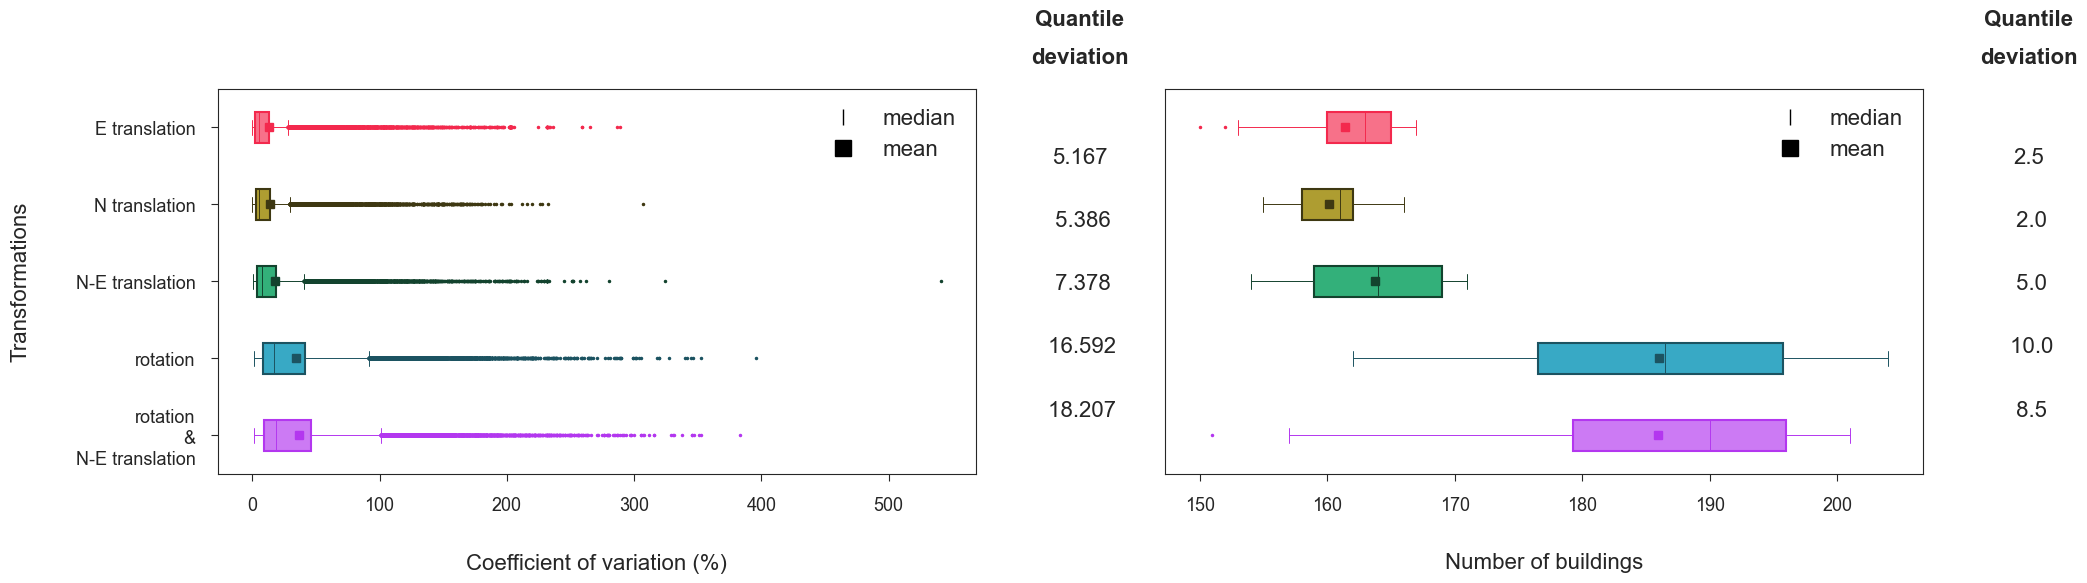

In [22]:
# Set up ax[p]is
fig, ax = plt.subplots(1, 2, figsize=(22, 5))

# Filter -9999
plt.subplots_adjust(wspace=.25)

x_label = ['Coefficient of variation (%)', 'Number of buildings']
y_label = ['Transformation']
data_df_list = [trans_comparison['cv'], trans_comparison['building']]

# Fontsize
fontsize = 16
labelpad = 28

for p in range(2):
    # Boxplot
    boxplot_sns = sns.boxplot(
        data=data_df_list[p],
        orient='h', # Boxplots lie horizontally
        showmeans=True, # Turn on mean sign
        meanprops=dict(marker='s', markersize=6), # Use big dot to visualise mean sign
        flierprops=dict(marker='o', markersize=1.5), # Visualise outliers
        width=0.4, # Size/width of boxplots
        palette='husl', saturation=1, ax=ax[p]
    )

    ax[p].plot([], [], '|', linewidth=1, color='black', label='median')
    ax[p].plot([], [], 's', linewidth=1, color='black', label='mean')
    ax[p].legend(fontsize=fontsize, frameon=False, loc='upper right', markerscale=2)


    # Colorise all lines of boxplots
    box_patches = [
        patch for patch in ax[p].patches if type(patch) == matplotlib.patches.PathPatch
    ]
    num_patches = len(box_patches)
    lines_per_boxplot = len(ax[p].lines) // num_patches
    for i, patch in enumerate(box_patches):
        # Set the linecolor on the patch to the facecolor, and set the facecolor to None
        col = lighten_color(patch.get_facecolor(), 1.5)
        patch.set_edgecolor(col)

        # Each box has associated Line2D objects (to make the whiskers, fliers, etc.)
        # Loop over them here, and use the same color as above
        for line in ax[p].lines[i * lines_per_boxplot: (i + 1) * lines_per_boxplot]:
            line.set_color(col)
            line.set_mfc(col)  # facecolor of fliers
            line.set_mec(col)  # edgecolor of fliers
            line.set_linewidth(0.7)

    if p==0:
        col1 = 'Quantile'
        col2 = 'deviation'
        data = '{0:.3f}\n {1:.3f}\n {2:.3f}\n {3:.3f}\n {4:.3f}'.format(5.1667, 5.3857, 7.3785, 16.5918, 18.2070)
        ax[p].text(650, -1.4, col1, fontsize=fontsize, horizontalalignment='center', weight='bold',
                 verticalalignment='center', linespacing=3.8)
        ax[p].text(650, -.9, col2, fontsize=fontsize, horizontalalignment='center', weight='bold',
                 verticalalignment='center', linespacing=3.8)
        ax[p].text(650, 2.03, data, fontsize=fontsize, horizontalalignment='center',
                 verticalalignment='center', linespacing=3.7)
    
    else:
        col1 = 'Quantile'
        col2 = 'deviation'
        data = '{0:.1f}\n {1:.1f}\n {2:.1f}\n {3:.1f}\n {4:.1f}'.format(2.5, 2, 5, 10, 8.5)
        ax[p].text(215, -1.4, col1, fontsize=fontsize, horizontalalignment='center', weight='bold',
                 verticalalignment='center', linespacing=3.8)
        ax[p].text(215, -.9, col2, fontsize=fontsize, horizontalalignment='center', weight='bold',
                 verticalalignment='center', linespacing=3.8)
        ax[p].text(215, 2.03, data, fontsize=fontsize, horizontalalignment='center',
                 verticalalignment='center', linespacing=3.7)
        
    

    # Adjust x and y labels
    ax[p].set_xlabel(x_label[p], fontsize=fontsize, labelpad=labelpad)
    if p==0:
        ax[p].set_ylabel('Transformations', rotation=-270, fontsize=fontsize, labelpad=labelpad+5)
    else:
        boxplot_sns.set(yticklabels=[])
        boxplot_sns.set(ylabel=None)
        boxplot_sns.tick_params(left=False)

    # Design size and style for ticks and labels
    for item in (ax[p].get_xticklabels() + ax[p].get_yticklabels()):  # For x, y ticks' labels
        item.set_fontsize(fontsize-3)
        
    ax[p].tick_params(direction='out', length=5, pad=labelpad-17)

# Save fig
plt.savefig(
    fr"S:\\new_versions_004\\comparison_trans.png",
    bbox_inches='tight', dpi=330
)